In [1]:
import math
import numpy as np
import pandas as pd
import plotly.express as px
import pickle

In [2]:
# Load the training and test datasets
train_data = pd.read_csv('/home/mukesh/Infernape/ml_scratch/data/train.csv')
test_data = pd.read_csv('/home/mukesh/Infernape/ml_scratch/data/test.csv')

# Remove rows with missing values
train_data = train_data.dropna()
test_data = test_data.dropna()

In [3]:
train_data.head()


,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
X = train_data[['x']]  # features must be 2D
y = train_data['y']  

In [5]:
X = np.array(train_data["x"])
X

array([ 24.,  50.,  15.,  38.,  87.,  36.,  12.,  81.,  25.,   5.,  16.,
        16.,  24.,  39.,  54.,  60.,  26.,  73.,  29.,  31.,  68.,  87.,
        58.,  54.,  84.,  58.,  49.,  20.,  90.,  48.,   4.,  25.,  42.,
         0.,  60.,  93.,  39.,   7.,  21.,  68.,  84.,   0.,  58.,  19.,
        36.,  19.,  59.,  51.,  19.,  33.,  85.,  44.,   5.,  59.,  14.,
         9.,  75.,  69.,  10.,  17.,  58.,  74.,  21.,  51.,  19.,  50.,
        24.,   0.,  12.,  75.,  21.,  64.,   5.,  58.,  32.,  41.,   7.,
         4.,   5.,  49.,  90.,   3.,  11.,  32.,  83.,  25.,  83.,  26.,
        76.,  95.,  53.,  77.,  42.,  25.,  54.,  55.,   0.,  73.,  35.,
        86.,  90.,  13.,  46.,  46.,  32.,   8.,  71.,  28.,  24.,  56.,
        49.,  79.,  90.,  89.,  41.,  27.,  58.,  26.,  31.,  70.,  71.,
        39.,   7.,  48.,  56.,  45.,  41.,   3.,  37.,  24.,  68.,  47.,
        27.,  68.,  74.,  95.,  79.,  21.,  95.,  54.,  56.,  80.,  26.,
        25.,   8.,  95.,  94.,  54.,   7.,  99.,  3

In [6]:
y = np.array(train_data["y"])
y

array([ 21.54945196,  47.46446305,  17.21865634,  36.58639803,
        87.28898389,  32.46387493,  10.78089683,  80.7633986 ,
        24.61215147,   6.96331907,  11.23757338,  13.53290206,
        24.60323899,  39.40049976,  48.43753838,  61.69900319,
        26.92832418,  70.4052055 ,  29.34092408,  25.30895192,
        69.02934339,  84.99484703,  57.04310305,  50.5921991 ,
        83.02772202,  57.05752706,  47.95883341,  24.34226432,
        94.68488281,  48.03970696,   7.08132338,  21.99239907,
        42.33151664,   0.32908944,  61.92303698,  91.17716423,
        39.45358014,   5.99606961,  22.59015942,  61.18044414,
        85.02778957,  -1.28631089,  61.94273962,  21.96033347,
        33.66194193,  17.60946242,  58.5630564 ,  52.82390762,
        22.1363481 ,  35.07467353,  86.18822311,  42.63227697,
         4.09817744,  61.2229864 ,  17.70677576,  11.85312574,
        80.23051695,  62.64931741,   9.6168598 ,  20.02797699,
        61.7510743 ,  71.61010303,  23.77154623,  51.90

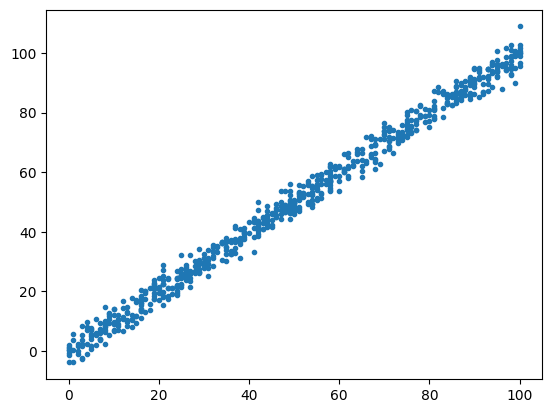

In [7]:
import matplotlib.pyplot as plt


plt.plot(X,y, ".")

## Simple Linear Regression

The equation of the best-fit line is:

$$
y = \beta_0 + \beta_1 x
$$

Where the slope \( \beta_1 \) is calculated as:

$$
\beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

And the intercept \( \beta_0 \) is:

$$
\beta_0 = \bar{y} - \beta_1 \bar{x}
$$


In [8]:
# Mean of x and y
x_mean = np.mean(X)
y_mean = np.mean(y)

In [9]:
denomerator = np.sum((X - x_mean)**2)

numerator = np.sum((X- x_mean)*(y - y_mean))


beta1 =  numerator / denomerator


beta0 = y_mean - beta1*x_mean




In [10]:
y_pred = beta0 + beta1*X

Intercept (β0): -0.10726546430095851
Slope (β1): 1.0006563818563037


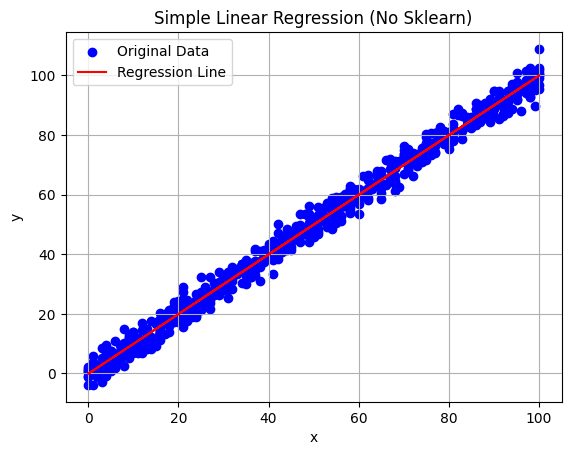

In [11]:
# Print coefficients
print(f"Intercept (β0): {beta0}")
print(f"Slope (β1): {beta1}")

# Plotting
plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Simple Linear Regression (No Sklearn)")
plt.grid(True)
plt.show()


In [15]:
def min_max_scale(arr):
    return (arr - np.min(arr)) / (np.max(arr) - np.min(arr)), np.min(arr), np.max(arr)

def inverse_min_max_scale(scaled, min_val, max_val):
    return scaled * (max_val - min_val) + min_val

# Apply scaling
X_scaled, X_min, X_max = min_max_scale(X)
y_scaled, y_min, y_max = min_max_scale(y)


In [ ]:
import numpy as np

def gradient_descent(X, y, alpha=0.01, epochs=1000, verbose=False):
    """    
    - X: 1D numpy array of input features
    - y: 1D numpy array of target values
    - alpha: learning rate
    - epochs: number of iterations
    - verbose: if True, print loss every 100 steps

    Returns:
    - beta_0: intercept
    - beta_1: slope
    """
    n = len(X)
    beta_0 = 0.0
    beta_1 = 0.0

    for epoch in range(epochs):
        # Predictions
        y_pred = beta_0 + beta_1 * X
        error = y - y_pred

        # Gradients
        db0 = -2 * np.sum(error) / n
        db1 = -2 * np.sum(X * error) / n

        # Update weights
        beta_0 -= alpha * db0
        beta_1 -= alpha * db1

        if verbose and epoch % 100 == 0:
            loss = np.mean(error ** 2)
            print(f"Epoch {epoch}: Loss = {loss:.2f}, β0 = {beta_0:.2f}, β1 = {beta_1:.2f}")

    return beta_0, beta_1


In [31]:
beta0, beta1 = gradient_descent(X_scaled, y_scaled, alpha=0.01, epochs=5000, verbose=True)


Epoch 0: Loss = 0.29, β0 = 0.01, β1 = 0.01
Epoch 100: Loss = 0.03, β0 = 0.32, β1 = 0.28
Epoch 200: Loss = 0.02, β0 = 0.31, β1 = 0.37
Epoch 300: Loss = 0.02, β0 = 0.28, β1 = 0.43
Epoch 400: Loss = 0.01, β0 = 0.25, β1 = 0.49
Epoch 500: Loss = 0.01, β0 = 0.22, β1 = 0.54
Epoch 600: Loss = 0.01, β0 = 0.20, β1 = 0.58
Epoch 700: Loss = 0.01, β0 = 0.18, β1 = 0.62
Epoch 800: Loss = 0.01, β0 = 0.16, β1 = 0.65
Epoch 900: Loss = 0.00, β0 = 0.14, β1 = 0.68
Epoch 1000: Loss = 0.00, β0 = 0.13, β1 = 0.71
Epoch 1100: Loss = 0.00, β0 = 0.12, β1 = 0.73
Epoch 1200: Loss = 0.00, β0 = 0.11, β1 = 0.75
Epoch 1300: Loss = 0.00, β0 = 0.10, β1 = 0.77
Epoch 1400: Loss = 0.00, β0 = 0.09, β1 = 0.78
Epoch 1500: Loss = 0.00, β0 = 0.08, β1 = 0.79
Epoch 1600: Loss = 0.00, β0 = 0.08, β1 = 0.81
Epoch 1700: Loss = 0.00, β0 = 0.07, β1 = 0.82
Epoch 1800: Loss = 0.00, β0 = 0.07, β1 = 0.83
Epoch 1900: Loss = 0.00, β0 = 0.06, β1 = 0.83
Epoch 2000: Loss = 0.00, β0 = 0.06, β1 = 0.84
Epoch 2100: Loss = 0.00, β0 = 0.06, β1 = 0.85


In [32]:
beta0

0.033606288367629356

In [33]:
beta1

0.8868895436428861

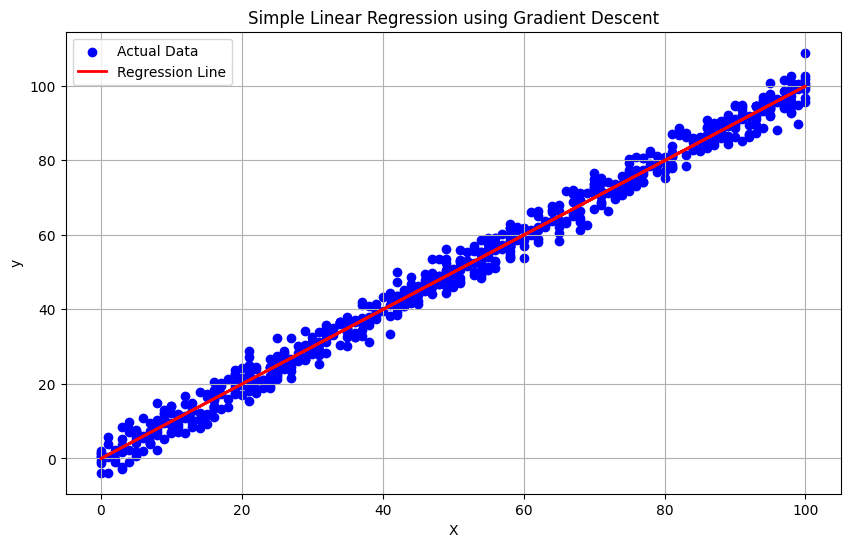

In [34]:
import matplotlib.pyplot as plt

# Step 1: Prediction on scaled X
y_pred_scaled = beta0 + beta1 * X_scaled

# Step 2: Inverse scale predictions and X (if needed for original scale plot)
y_pred = inverse_min_max_scale(y_pred_scaled, y_min, y_max)
X_original = inverse_min_max_scale(X_scaled, X_min, X_max)

# Step 3: Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_original, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression using Gradient Descent')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
X = X.reshape(-1, 1)

X.shape

(699, 1)

In [36]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso


model = LinearRegression()
model.fit(X, y)

# Print coefficients
print("Intercept:", model.intercept_)
print("Slope (coefficient):", model.coef_[0])

# Predict using the model
y_pred = model.predict(X)
print("\nPredictions:", y_pred)

Intercept: -0.10726546430097272
Slope (coefficient): 1.000656381856304

Predictions: [23.9084877  49.92555363 14.90258026 37.91767705 86.94983976 35.91636428
 11.90061112 80.94590147 24.90914408  4.89601644 15.90323665 15.90323665
 23.9084877  38.91833343 53.92817916 59.93211745 25.90980046 72.94065041
 28.91176961 30.91308237 67.9373685  86.94983976 57.93080468 53.92817916
 83.94787061 57.93080468 48.92489725 19.90586217 89.9518089  47.92424086
  3.89536006 24.90914408 41.92030257 -0.10726546 59.93211745 92.95377805
 38.91833343  6.89732921 20.90651855 67.9373685  83.94787061 -0.10726546
 57.93080468 18.90520579 35.91636428 18.90520579 58.93146107 50.92621001
 18.90520579 32.91439514 84.94852699 43.92161534  4.89601644 58.93146107
 13.90192388  8.89864197 74.94196317 68.93802488  9.89929835 16.90389303
 57.93080468 73.94130679 20.90651855 50.92621001 18.90520579 49.92555363
 23.9084877  -0.10726546 11.90061112 74.94196317 20.90651855 63.93474297
  4.89601644 57.93080468 31.91373876 40

In [37]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Evaluate the model
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

# Print metrics
print("Model Evaluation:")
print("R² Score:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Model Evaluation:
R² Score: 0.9907015319025518
Mean Absolute Error (MAE): 2.2271519536455573
Mean Squared Error (MSE): 7.867752733487687
Root Mean Squared Error (RMSE): 2.8049514672250013


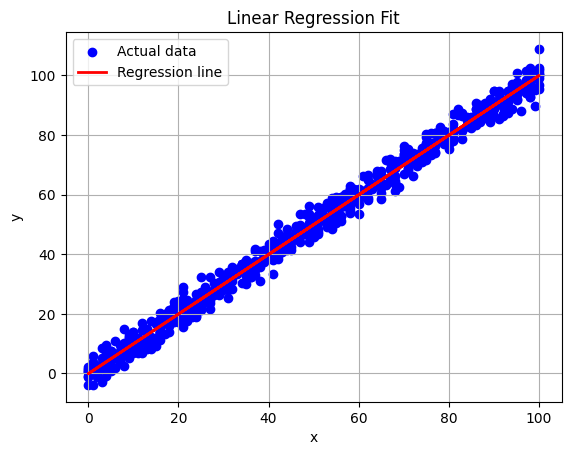

In [38]:
import matplotlib.pyplot as plt

# Scatter plot of actual data
plt.scatter(X, y, color='blue', label='Actual data')

# Plot regression line
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')

# Labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

# Show plot
plt.grid(True)
plt.show()
